In [53]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [54]:
predictActionValueIncrement = -2
predictActionCountIncrement = -1

In [55]:
from sklearn.metrics import  ConfusionMatrixDisplay,\
                  classification_report,  RocCurveDisplay, \
                    accuracy_score, f1_score, precision_score, recall_score

In [56]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import display, HTML
show_html = lambda html: display(HTML(html))

In [57]:
import apafib
data = apafib.load_NASDAQ()
columns = data.columns
data = data.to_numpy()
data_t = []
for day in range(len(data)):
    try:
        data_t.append(np.append(data[day],[bool(data[day][0] > data[day-1][0]), bool(data[day][1] > data[day-1][1])]))
    except IndexError:
        data_t.append(np.append(data[day],[False, False]))
data = pd.DataFrame(data_t,columns=[*columns, 'actionsValueIncreased', 'actionsCountIncreased'])
data.head()

,GOOGLE-P,GOOGLE-V,GOOGLE-GAP,MSFT-P,MSFT-V,MSFT-GAP,AAPL-P,AAPL-V,AAPL-GAP,INTEL-P,INTEL-V,INTEL-GAP,AMD-P,AMD-V,AMD-GAP,actionsValueIncreased,actionsCountIncreased
0,45.3330,18846560.0,0.4800,72.15,17698800.0,0.78,39.3025,105320280.0,0.6950,34.92,26479700.0,0.58,12.05,58786300.0,0.560,0.0,0.0
1,46.2345,23326400.0,0.7192,73.16,14333220.0,0.89,39.9450,86259560.0,0.4950,34.65,26093400.0,0.57,12.17,38946780.0,0.230,1.0,1.0
2,46.3500,21771500.0,0.5285,72.72,13758650.0,0.62,39.9950,77507760.0,0.3975,34.66,19775620.0,0.43,12.48,44193270.0,0.585,1.0,0.0
3,46.0640,25323820.0,0.7670,72.69,17097240.0,0.79,39.8175,79128680.0,0.5475,34.71,14283180.0,0.34,12.50,37161680.0,0.320,0.0,1.0
4,45.7945,21055280.0,0.5027,72.82,12790300.0,0.87,39.9650,100738400.0,0.3225,34.67,14714810.0,0.35,12.43,29650370.0,0.320,0.0,0.0


In [58]:
data.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
GOOGLE-P,1259.0,8.235332e+01,3.232053e+01,4.533300e+01,5.610350e+01,6.736500e+01,1.129415e+02,1.507090e+02
GOOGLE-V,1259.0,3.091715e+07,1.347789e+07,6.935060e+06,2.256946e+07,2.773012e+07,3.531136e+07,1.238938e+08
GOOGLE-GAP,1259.0,1.740178e+00,1.209965e+00,2.380000e-01,8.713000e-01,1.371000e+00,2.218750e+00,9.215500e+00
MSFT-P,1259.0,1.818206e+02,7.862105e+01,7.215000e+01,1.081500e+02,1.634900e+02,2.524850e+02,3.431100e+02
MSFT-V,1259.0,2.953929e+07,1.299424e+07,7.425603e+06,2.125149e+07,2.629290e+07,3.374066e+07,1.109450e+08
MSFT-GAP,1259.0,3.812815e+00,2.912805e+00,3.400000e-01,1.660000e+00,3.060000e+00,5.141250e+00,2.364000e+01
AAPL-P,1259.0,9.035068e+01,4.626909e+01,3.554750e+01,4.748250e+01,7.193250e+01,1.336400e+02,1.820100e+02
AAPL-V,1259.0,1.184749e+08,5.504025e+07,4.099995e+07,8.193916e+07,1.042700e+08,1.382814e+08,4.268848e+08
AAPL-GAP,1259.0,2.068242e+00,1.694044e+00,2.135000e-01,7.762500e-01,1.502500e+00,2.925000e+00,1.281000e+01
INTEL-P,1259.0,5.089460e+01,6.684044e+00,3.452000e+01,4.672000e+01,5.059000e+01,5.538000e+01,6.847000e+01


In [4]:
# fig, axes = plt.subplots(5,3,figsize=(15,15))
# for i, c in enumerate(data.columns):
#     ax = axes.reshape(-1)[i]
#     if data[c].dtype.kind == 'O':
#         a = sns.countplot(x=c,data=data,ax=ax)
#     else:
#         b = sns.histplot(x=c,data=data,ax=ax)
# plt.tight_layout()

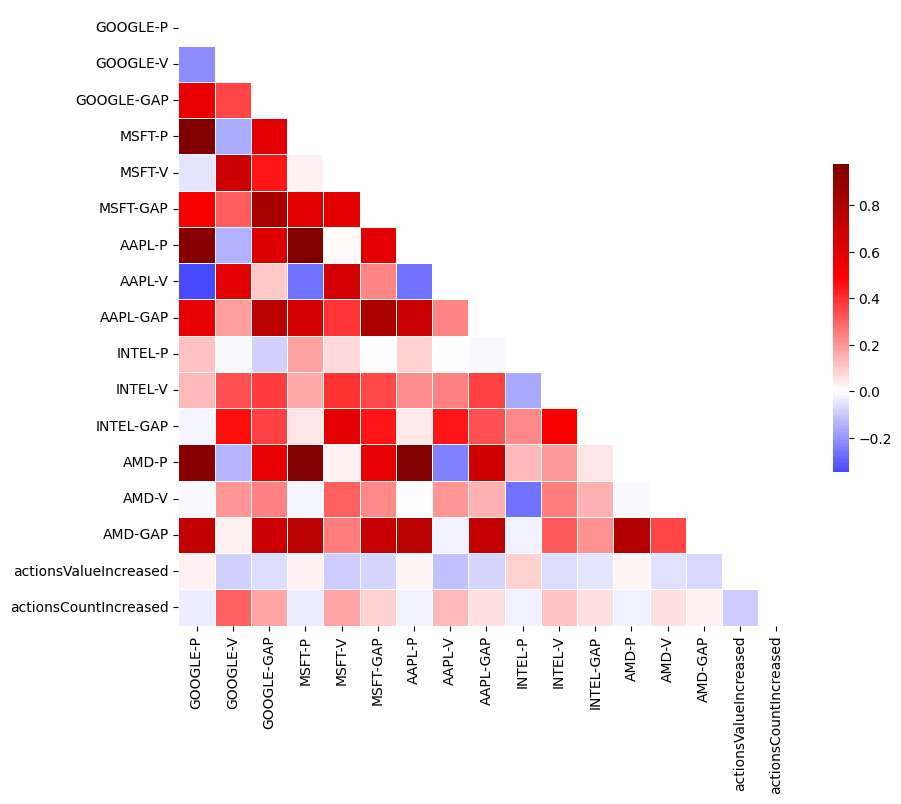

In [59]:
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=mask, cmap='seismic',  center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [60]:
s = 1000
w = 3
data_train = data.iloc[:s]
data_test = data.iloc[s:]

In [62]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_train_n = scaler.fit_transform(data_train.to_numpy())
data_test_n = scaler.transform(data_test.to_numpy())

In [51]:
from numpy.lib.stride_tricks import sliding_window_view
windows_train = sliding_window_view(data_train_n, w+1, axis=0).copy()
windows_test = sliding_window_view(data_test_n, w+1, axis=0).copy()


X_train_w, y_train_w = windows_train.squeeze()[:,:,:-1], [*map(lambda x : x[w], windows_train.squeeze()[:,predictActionValueIncrement])]
X_test_w, y_test_w = windows_test.squeeze()[:,:,:-1], [*map(lambda x: x[w], windows_test.squeeze()[:,predictActionValueIncrement])]

X_train_w = X_train_w.reshape(w-s, w*data.columns.size)
X_test_w = X_test_w.reshape(len(data)-w-s, w*data.columns.size)

In [52]:
from sklearn.linear_model import LogisticRegression
from skopt import BayesSearchCV
from sklearn.model_selection import cross_val_score

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_w,y_train_w)
print(np.mean(cross_val_score(lr,X_train_w,y_train_w,cv=10)))

param = {'penalty':['l2', 'none'], 'C':10**np.linspace(-3,3,21, endpoint=True)}
lr_gs =  BayesSearchCV(lr,param,cv=10, n_jobs=-1, refit=True)
lr_gs.fit(X_train_w, y_train_w)

LogisticRegression(max_iter=1000)

0.5085858585858587


/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalt

KeyboardInterrupt: 

In [24]:
print(classification_report(lr_gs.predict(X_test_w), y_test_w, target_names=['Down','Up']))

              precision    recall  f1-score   support

        Down       0.00      0.00      0.00         0
          Up       1.00      0.52      0.68       256

    accuracy                           0.52       256
   macro avg       0.50      0.26      0.34       256
weighted avg       1.00      0.52      0.68       256



/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, make_scorer
param = {'hidden_layer_sizes':[100, 200, 300], 
         'activation':['relu',  'logistic'], 
         'alpha':[0.0001, 0.001, 0.01],
         'momentum': [0.95, 0.90, 0.85], 
         'learning_rate_init': [0.001, 0.01, 0.1],
         'n_iter_no_change':[30, 40, 50], 
         'learning_rate': ['constant', 'invscaling', 'adaptive']}

mlp =  MLPClassifier(max_iter=10000,early_stopping=True,random_state=0)
print(np.mean(cross_val_score(mlp,X_train_w,y_train_w,cv=10)))

mlp_bs = BayesSearchCV(mlp,param,n_iter=15, 
                        cv=TimeSeriesSplit(n_splits=5, gap=w+1), 
                        scoring=make_scorer(mean_squared_error, greater_is_better=False),
                        n_jobs=-1, 
                        refit=True, random_state=0)    
mlp_bs.fit(X_train_w, y_train_w);

BayesSearchCV(cv=TimeSeriesSplit(gap=4, max_train_size=None, n_splits=5, test_size=None),
              estimator=MLPClassifier(early_stopping=True, max_iter=10000,
                                      random_state=0),
              n_iter=15, n_jobs=-1, random_state=0,
              scoring=make_scorer(mean_squared_error, greater_is_better=False),
              search_spaces={'activation': ['relu', 'logistic'],
                             'alpha': [0.0001, 0.001, 0.01],
                             'hidden_layer_sizes': [100, 200, 300],
                             'learning_rate': ['constant', 'invscaling',
                                               'adaptive'],
                             'learning_rate_init': [0.001, 0.01, 0.1],
                             'momentum': [0.95, 0.9, 0.85],
                             'n_iter_no_change': [30, 40, 50]})

OrderedDict([('activation', 'logistic'),
             ('alpha', 0.0001),
             ('hidden_layer_sizes', 100),
             ('learning_rate', 'adaptive'),
             ('learning_rate_init', 0.1),
             ('momentum', 0.9),
             ('n_iter_no_change', 50)])

In [25]:
print(classification_report(mlp_bs.predict(X_test_w), y_test_w, target_names=['Down','Up']))

              precision    recall  f1-score   support

        Down       0.00      0.00      0.00         0
          Up       1.00      0.52      0.68       256

    accuracy                           0.52       256
   macro avg       0.50      0.26      0.34       256
weighted avg       1.00      0.52      0.68       256



/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
show_html(pd.DataFrame(mlp_bs.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html())

,params,mean_test_score,rank_test_score
12,"{'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': 100, 'learning_rate': 'adaptive', 'learning_rate_init': 0.1, 'momentum': 0.9, 'n_iter_no_change': 50}",-0.446988,1
11,"{'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': 300, 'learning_rate': 'adaptive', 'learning_rate_init': 0.1, 'momentum': 0.9, 'n_iter_no_change': 30}",-0.450602,2
14,"{'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': 300, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'momentum': 0.9, 'n_iter_no_change': 50}",-0.453012,3
13,"{'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': 300, 'learning_rate': 'adaptive', 'learning_rate_init': 0.1, 'momentum': 0.85, 'n_iter_no_change': 50}",-0.462651,4
10,"{'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': 100, 'learning_rate': 'adaptive', 'learning_rate_init': 0.01, 'momentum': 0.9, 'n_iter_no_change': 30}",-0.467470,5


In [63]:
X_train_w, y_train_w = windows_train.squeeze()[:,:,:-1], [*map(lambda x : x[w], windows_train.squeeze()[:,predictActionCountIncrement])]
X_test_w, y_test_w = windows_test.squeeze()[:,:,:-1], [*map(lambda x: x[w], windows_test.squeeze()[:,predictActionCountIncrement])]

X_train_w = X_train_w.reshape(w-s, w*data.columns.size)
X_test_w = X_test_w.reshape(len(data)-w-s, w*data.columns.size)

In [68]:
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train_w,y_train_w)
print(np.mean(cross_val_score(lr,X_train_w,y_train_w,cv=10)))

param = {'penalty':['l2', 'none'], 'C':10**np.linspace(-3,3,21, endpoint=True)}
lr_gs =  BayesSearchCV(lr,param,cv=10, n_jobs=-1, refit=True)
lr_gs.fit(X_train_w, y_train_w)

LogisticRegression(max_iter=1000)

0.650939393939394


/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalt

BayesSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
              search_spaces={'C': array([1.00000000e-03, 1.99526231e-03, 3.98107171e-03, 7.94328235e-03,
       1.58489319e-02, 3.16227766e-02, 6.30957344e-02, 1.25892541e-01,
       2.51188643e-01, 5.01187234e-01, 1.00000000e+00, 1.99526231e+00,
       3.98107171e+00, 7.94328235e+00, 1.58489319e+01, 3.16227766e+01,
       6.30957344e+01, 1.25892541e+02, 2.51188643e+02, 5.01187234e+02,
       1.00000000e+03]),
                             'penalty': ['l2', 'none']})

In [69]:
print(classification_report(lr_gs.predict(X_test_w), y_test_w, target_names=['Down','Up']))

              precision    recall  f1-score   support

        Down       0.79      0.60      0.68       181
          Up       0.39      0.61      0.47        75

    accuracy                           0.60       256
   macro avg       0.59      0.61      0.58       256
weighted avg       0.67      0.60      0.62       256

